In [1]:
import yfinance as yf
import numpy as np
import datetime as dt
import statsmodels.api as sm

# Download historical data for required stocks
ticker = "AAPL"
ohlcv = yf.download(ticker,dt.date.today()-dt.timedelta(1825),dt.datetime.today())

[*********************100%***********************]  1 of 1 completed


In [35]:
from scipy.stats import linregress

In [41]:
def slope(ser,n):
    "function to calculate the slope of regression line for n consecutive points on a plot"
    ser = (ser - ser.min())/(ser.max() - ser.min())
    x = np.array(range(len(ser)))
    x = (x - x.min())/(x.max() - x.min())
    slopes = [i*0 for i in range(n-1)]
    for i in range(n,len(ser)+1):
        y_scaled = ser[i-n:i]
        x_scaled = x[i-n:i]
        reg = linregress(x=x_scaled, y=y_scaled)
        slopes.append(reg[0])
        
#        x_scaled = sm.add_constant(x_scaled)
#        model = sm.OLS(y_scaled,x_scaled)
#        results = model.fit()
#        slopes.append(results.params[-1])
##    slope_angle = (np.rad2deg(np.arctan(np.array(slopes))))
##    return np.array(slope_angle)
    return slopes


In [6]:
s = ohlcv['Adj Close']

In [50]:
y_range = s.max()-s.min()
t_range = len(s)
print(y_range, trange)

281.5670852661133 1258


In [51]:
sdiff = (s - s.shift(1)) * t_range / y_range

In [58]:
sdiff.rolling(5, center=True, win_type='hamming' ).mean().head(10)

Date
2015-07-01         NaN
2015-07-02         NaN
2015-07-06         NaN
2015-07-07   -4.494792
2015-07-08   -8.117195
2015-07-09   -4.201812
2015-07-10    5.315366
2015-07-13    7.321972
2015-07-14    4.192237
2015-07-15    4.365430
Name: Adj Close, dtype: float64

In [57]:
ohlcv.head(10)

,Open,High,Low,Close,Adj Close,Volume,close_slope,slope,slope_reg
Date,,,,,,,,,
2015-07-01,126.900002,126.940002,125.989998,126.599998,116.675667,30238800,0.000000,0.000000,0.000000
2015-07-02,126.430000,126.690002,125.769997,126.440002,116.528198,27211000,0.000000,0.000000,0.000000
2015-07-06,124.940002,126.230003,124.849998,126.000000,116.122704,28060400,0.000000,0.000000,0.000000
2015-07-07,125.889999,126.150002,123.769997,125.690002,115.837006,46946800,0.000000,0.000000,0.000000
2015-07-08,124.480003,124.639999,122.540001,122.570000,112.961594,60761600,-74.576691,-3.624717,-3.624717
2015-07-09,123.849998,124.059998,119.220001,120.070000,110.657570,78595000,-81.451797,-6.652864,-6.652864
2015-07-10,121.940002,123.849998,121.209999,123.279999,113.615921,61354500,-77.605812,-4.550462,-4.550462
2015-07-13,125.029999,125.760002,124.320000,125.660004,115.809349,41440500,14.971598,0.267418,0.267418
2015-07-14,126.040001,126.370003,125.040001,125.610001,115.763260,31768100,78.235058,4.801405,4.801405


In [42]:
ohlcv["slope_reg"] = slope(ohlcv["Adj Close"],5)

In [4]:
ohlcv["close_slope"] = slope(ohlcv["Adj Close"],5)

In [49]:
abs(ohlcv['slope'] - ohlcv['slope_reg']).sum() / ohlcv.shape[0]

3.7161366478170816e-13

In [37]:
reg = linregress(x=x, y=y)

In [40]:
reg[0], reg[1], reg

(0.9899999999999999,
 10.129999999999999,
 LinregressResult(slope=0.9899999999999999, intercept=10.129999999999999, rvalue=0.99498743710662, pvalue=0.000425693286577891, stderr=0.0574456264653803))

In [36]:
x = [1,2,3,4,5]
y = [11.1, 12.3, 12.9, 14.0, 15.2]

In [34]:
x = sm.add_constant(x)
print(x)
model = sm.OLS(y,x)

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]]


In [26]:
results = model.fit()

In [27]:
results.params

array([10.13,  0.99])

In [32]:
np.rad2deg(np.arctan(np.array(-3.624717)))

-74.57669192275307

### ge OBV

In [59]:
ticker = "AAPL"
data2 = yf.download(ticker,dt.date.today()-dt.timedelta(1825),dt.datetime.today())

[*********************100%***********************]  1 of 1 completed


In [92]:
def OBV(DF):
    """function to calculate On Balance Volume"""
    df = DF.copy()
    df['daily_ret'] = df['Adj Close'].pct_change()
    df['direction'] = np.where(df['daily_ret']>=0,1,-1)
#    df['direction'][0] = 0
#    df.iloc[0]['direction'] = 0
    df.iloc[0, t3.columns.get_loc('direction')] = 0
    df['vol_adj'] = df['Volume'] * df['direction']
    df['obv'] = df['vol_adj'].cumsum()
    return df
#    return df['obv']

In [93]:
t3 = OBV(data2)

In [91]:
t3.iloc[0, t3.columns.get_loc('direction')] = 0

In [94]:
t3.head()

,Open,High,Low,Close,Adj Close,Volume,daily_ret,direction,vol_adj,obv
Date,,,,,,,,,,
2015-07-01,126.900002,126.940002,125.989998,126.599998,116.675667,30238800,NaN,0,0,0
2015-07-02,126.430000,126.690002,125.769997,126.440002,116.528198,27211000,-0.001264,-1,-27211000,-27211000
2015-07-06,124.940002,126.230003,124.849998,126.000000,116.122704,28060400,-0.003480,-1,-28060400,-55271400
2015-07-07,125.889999,126.150002,123.769997,125.690002,115.837006,46946800,-0.002460,-1,-46946800,-102218200
2015-07-08,124.480003,124.639999,122.540001,122.570000,112.961594,60761600,-0.024823,-1,-60761600,-162979800


In [78]:
t2.head()

Date
2015-07-01    -30238800
2015-07-02    -57449800
2015-07-06    -85510200
2015-07-07   -132457000
2015-07-08   -193218600
Name: obv, dtype: int64

In [80]:
t1.head()

Date
2015-07-01            0
2015-07-02    -27211000
2015-07-06    -55271400
2015-07-07   -102218200
2015-07-08   -162979800
Name: obv, dtype: int64

### Renko chart

In [99]:
from stocktrends import Renko
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates

In [95]:
def ATR(DF,n):
    "function to calculate True Range and Average True Range"
    df = DF.copy()
    df['H-L']=abs(df['High']-df['Low'])
    df['H-PC']=abs(df['High']-df['Adj Close'].shift(1))
    df['L-PC']=abs(df['Low']-df['Adj Close'].shift(1))
    df['TR']=df[['H-L','H-PC','L-PC']].max(axis=1,skipna=False)
    df['ATR'] = df['TR'].rolling(n).mean()
    df2 = df.drop(['H-L','H-PC','L-PC'],axis=1)
    return df2

In [180]:
def renko_DF(DF, n):
    '''function to convert ohlc data into renko bricks 
    n = number of days to calcualte average true range .. 
    '''
    df = DF.copy()
    df.reset_index(inplace=True)
    df = df.iloc[:,[0,1,2,3,5,6]]
    df.rename(columns = {"Date" : "date", "High" : "high","Low" : "low", "Open" : "open","Adj Close" : "close", "Volume" : "volume"}, inplace = True)
    df2 = Renko(df)
    df2.brick_size = round(ATR(DF,n)["ATR"][-1],0)
    print('brick size=', df2.brick_size)
    renko_df = df2.get_ohlc_data() #if using older version of the library please use get_bricks() instead
    return renko_df

In [218]:
def plot_renko_simple(dfrenko):
    df_renko = dfrenko.copy()
    fig = plt.figure(figsize=(18,5))
    axes = fig.gca()
    plt.plot(df_renko[df_renko['uptrend']==True]['date'], 
             df_renko[df_renko['uptrend']== True]['close'], 'gx')
    plt.plot(df_renko[df_renko['uptrend']==False]['date'], 
             df_renko[df_renko['uptrend']== False]['close'], 'ro')
    date_form = mdates.DateFormatter("%Y-%m")
    axes.xaxis.set_major_formatter(date_form)
    plt.xticks(rotation = 90)
#    axes.tick_params(axis='x', labelrotation=90, labelsize=16)
#    axes.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
#    axes.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m"))
    axes.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.draw()
    
                                                               

In [220]:
def plot_renko(dfrenko, atr=11):
    df_renko = dfrenko.copy()
    fig = plt.figure(figsize=(18,5))
    axes = fig.gca()

    df_renko['datediff'] =  df_renko['date'].shift(-1) - df_renko['date'] 
    for index, row in dfA.iterrows():
        if row['uptrend']:
            c = 'green'
        else:
            c = 'red'
        sdate=row['date']
        edate = row['date'] + row['datediff']
        start = mdates.date2num(sdate)
        end = mdates.date2num(edate)
    #    print(index, start, end)
        renko = Rectangle((start, row['close']), end-start, atr, facecolor=c)
        axes.add_patch(renko)
    #    print(index, row['date'], row['close'], row['uptrend'], row['datediff'])
    datemax =  mdates.date2num(dfA['date'].max())
    datemin =  mdates.date2num(dfA['date'].min())
    ymin = dfA['close'].min()
    ymax = dfA['close'].max()

    #locator = mdates.AutoDateLocator(minticks=3)
    #formatter = mdates.AutoDateFormatter(locator)
    #axes.xaxis.set_major_locator(locator)
    #axes.xaxis.set_major_formatter(formatter)

    date_form = mdates.DateFormatter("%Y-%m")
    axes.xaxis.set_major_formatter(date_form)
    axes.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    #plt.xticks(rotation = 90)
    axes.tick_params(axis='x', labelrotation=90, labelsize=16)

    plt.xlim([datemin-30, datemax+30])
    plt.ylim([ymin-10, ymax+10])

    plt.show()


In [184]:
ticker = "MSFT"
dfmsft = yf.download(ticker,dt.date.today()-dt.timedelta(500),dt.datetime.today())
msft_renko = renko_DF(df5, 120)

[*********************100%***********************]  1 of 1 completed
brick size= 11.0


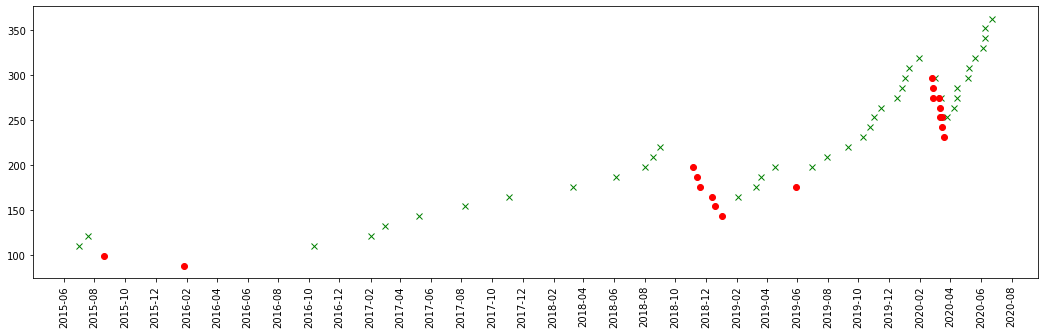

In [219]:
plot_renko_simple(msft_renko)

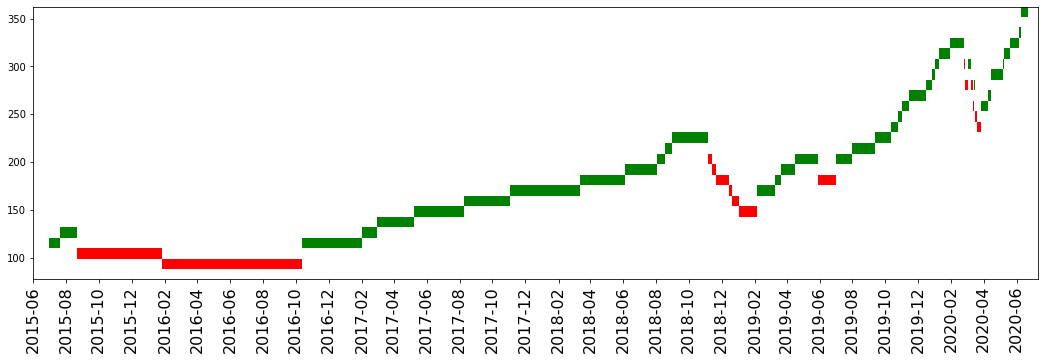

In [221]:
plot_renko(msft_renko, 11)

In [97]:
ticker = "AAPL"
df5 = yf.download(ticker,dt.date.today()-dt.timedelta(1825),dt.datetime.today())
df_renko = renko_DF(df5, 120)

[*********************100%***********************]  1 of 1 completed


In [128]:
df_renko['datediff'] =  df_renko['date'].shift(-1) - df_renko['date'] 

In [159]:
df_renko.head()

,date,open,high,low,close,uptrend,datediff
0,2015-07-01,99.0,110.0,99.0,110.0,True,19 days
1,2015-07-20,110.0,121.0,110.0,121.0,True,32 days
2,2015-08-21,110.0,110.0,99.0,99.0,False,159 days
3,2016-01-27,99.0,99.0,88.0,88.0,False,259 days
4,2016-10-12,99.0,110.0,99.0,110.0,True,112 days


In [160]:
dfA = df_renko.copy().dropna(axis=0)
#dfA.dropna(axis=1)

In [161]:
dfA.head()

,date,open,high,low,close,uptrend,datediff
0,2015-07-01,99.0,110.0,99.0,110.0,True,19 days
1,2015-07-20,110.0,121.0,110.0,121.0,True,32 days
2,2015-08-21,110.0,110.0,99.0,99.0,False,159 days
3,2016-01-27,99.0,99.0,88.0,88.0,False,259 days
4,2016-10-12,99.0,110.0,99.0,110.0,True,112 days


In [156]:
print(dfA['date'].max(), dfA['date'].min())

2020-06-23 00:00:00 2015-07-01 00:00:00


In [158]:
dfA.head()

,date,open,high,low,close,uptrend
0,2015-07-01,99.0,110.0,99.0,110.0,True
1,2015-07-20,110.0,121.0,110.0,121.0,True
2,2015-08-21,110.0,110.0,99.0,99.0,False
3,2016-01-27,99.0,99.0,88.0,88.0,False
4,2016-10-12,99.0,110.0,99.0,110.0,True


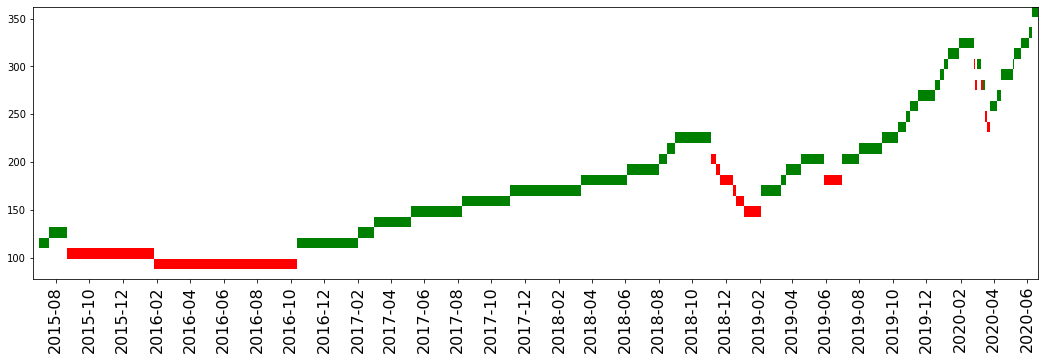

In [182]:
fig = plt.figure(figsize=(18,5))
axes = fig.gca()

df_renko['datediff'] =  df_renko['date'].shift(-1) - df_renko['date'] 
for index, row in dfA.iterrows():
    if row['uptrend']:
        c = 'green'
    else:
        c = 'red'
    sdate=row['date']
    edate = row['date'] + row['datediff']
    start = mdates.date2num(sdate)
    end = mdates.date2num(edate)
#    print(index, start, end)
    renko = Rectangle((start, row['close']), end-start, 11, facecolor=c)
    axes.add_patch(renko)
#    print(index, row['date'], row['close'], row['uptrend'], row['datediff'])
datemax =  mdates.date2num(dfA['date'].max())
datemin =  mdates.date2num(dfA['date'].min())
ymin = dfA['close'].min()
ymax = dfA['close'].max()

#locator = mdates.AutoDateLocator(minticks=3)
#formatter = mdates.AutoDateFormatter(locator)
#axes.xaxis.set_major_locator(locator)
#axes.xaxis.set_major_formatter(formatter)

date_form = mdates.DateFormatter("%Y-%m")
axes.xaxis.set_major_formatter(date_form)
axes.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
#plt.xticks(rotation = 90)
axes.tick_params(axis='x', labelrotation=90, labelsize=16)

plt.xlim([datemin-10, datemax+10])
plt.ylim([ymin-10, ymax+10])

plt.show()
 


,date,open,high,low,close,uptrend,datediff
0,2015-07-01,99.0,110.0,99.0,110.0,True,19 days
1,2015-07-20,110.0,121.0,110.0,121.0,True,32 days
2,2015-08-21,110.0,110.0,99.0,99.0,False,159 days
3,2016-01-27,99.0,99.0,88.0,88.0,False,259 days
4,2016-10-12,99.0,110.0,99.0,110.0,True,112 days


In [136]:
for index, row in dfA.head(3).iterrows():
    print(index, row['date'], row['close'], row['uptrend'], row['datediff'])
    

0 2015-07-01 00:00:00 110.0 True 19 days 00:00:00
1 2015-07-20 00:00:00 121.0 True 32 days 00:00:00
2 2015-08-21 00:00:00 99.0 False 159 days 00:00:00


In [101]:
df_renko

,date,open,high,low,close,uptrend
0,2015-07-01,99.0,110.0,99.0,110.0,True
1,2015-07-20,110.0,121.0,110.0,121.0,True
2,2015-08-21,110.0,110.0,99.0,99.0,False
3,2016-01-27,99.0,99.0,88.0,88.0,False
4,2016-10-12,99.0,110.0,99.0,110.0,True
5,2017-02-01,110.0,121.0,110.0,121.0,True
6,2017-03-01,121.0,132.0,121.0,132.0,True
7,2017-05-08,132.0,143.0,132.0,143.0,True
8,2017-08-09,143.0,154.0,143.0,154.0,True
9,2017-11-03,154.0,165.0,154.0,165.0,True


In [107]:
brick_size = 2

def plot_renko(data, brick_size):
    fig = plt.figure(1)
    fig.clf()
    axes = fig.gca()
    y_max = max(data)
    prev_num = 0
    bricks = []
    for delta in data:
        if delta > 0:
            bricks.extend([1]*delta)
        else:
            bricks.extend([-1]*abs(delta))

    for index, number in enumerate(bricks):
        if number == 1:
            facecolor='green'
        else:
            facecolor='red'

        prev_num += number

        renko = Rectangle(
            (index, prev_num * brick_size), 1, brick_size,
            facecolor=facecolor, alpha=0.5
        )
        axes.add_patch(renko)

    plt.show()

In [119]:
#df = pd.read_csv(file)
df = df5.copy()
df.rename(columns={'Adj Close':'close'}, inplace=True)
df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df['cdiff'] = df['close'] - df['close'].shift(1)
df.dropna(inplace=True)
df['bricks'] = df.loc[:, ('cdiff', )] / brick_size

bricks = df[df['bricks'] != 0]['bricks'].values

In [121]:
bricks

array([-0.07373428, -0.20274734, -0.14284897, ...,  2.38999939,
       -5.60499573,  2.96499634])

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

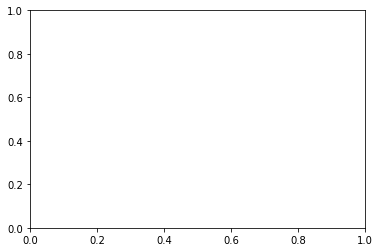

In [114]:
plot_renko(bricks, brick_size)

### CAGR


In [223]:
icker = "^GSPC"
SnP = yf.download(ticker,dt.date.today()-dt.timedelta(1825),dt.datetime.today())

[*********************100%***********************]  1 of 1 completed


In [224]:
SnP.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-07-02,44.480000,44.750000,44.060001,44.400002,40.183064,21752000
2015-07-06,43.959999,44.480000,43.950001,44.389999,40.174019,23034000
2015-07-07,44.340000,44.490002,43.320000,44.299999,40.092571,36435800
2015-07-08,44.439999,44.900002,44.029999,44.240002,40.038265,39785900
2015-07-09,44.750000,45.220001,44.500000,44.520000,40.291676,32424700


In [226]:
    df = SnP.copy()
    df["daily_ret"] = df["Adj Close"].pct_change()
    df["cum_return"] = (1 + df["daily_ret"]).cumprod()

In [227]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,daily_ret,cum_return
Date,,,,,,,,
2015-07-02,44.480000,44.750000,44.060001,44.400002,40.183064,21752000,NaN,NaN
2015-07-06,43.959999,44.480000,43.950001,44.389999,40.174019,23034000,-0.000225,0.999775
2015-07-07,44.340000,44.490002,43.320000,44.299999,40.092571,36435800,-0.002027,0.997748
2015-07-08,44.439999,44.900002,44.029999,44.240002,40.038265,39785900,-0.001355,0.996397
2015-07-09,44.750000,45.220001,44.500000,44.520000,40.291676,32424700,0.006329,1.002703


In [228]:
40.174019 / 40.183064 -1

-0.00022509483099641958

In [229]:
S = pd.Series(range(1,20))

In [234]:
df = pd.DataFrame(data={'price' : range(1,20)})

In [237]:
df['ret']=df['price'].pct_change()

In [238]:
df.head()

,price,ret
0,1,NaN
1,2,1.000000
2,3,0.500000
3,4,0.333333
4,5,0.250000


In [239]:
df['sret'] = (df['price'] -df['price'].shift(1)) /df['price']

In [245]:
df['cum_sret'] = df['ret'].cumsum()

In [246]:
df.head()

,price,ret,sret,cum_ret,cum_sret
0,1,NaN,NaN,NaN,NaN
1,2,1.000000,0.500000,2.0,1.000000
2,3,0.500000,0.333333,3.0,1.500000
3,4,0.333333,0.250000,4.0,1.833333
4,5,0.250000,0.200000,5.0,2.083333


In [250]:
x = df['ret'].dropna().values

In [251]:
x.std()

0.22512202737816026